# Step-By-Step Tutorial Using Scikit-Learn, Pandas

We'll go through a classic Machine Learning example in this notebook and break down what each step of the process is like.

We'll start with a classic dataset known as the __Iris__ dataset. Take a look at what it looks like [here](https://github.com/pandas-dev/pandas/blob/master/pandas/tests/data/iris.csv).

About the dataset:

- 3 possible labels for the plant: `Iris-setosa, Iris-virginica, Iris-versicolor`
- 4 features:
    - `SepalLength`: float
    - `SepalWidth`: float
    - `PetalLength`: float
    - `PetalWidth`: float
- Problem: Given the 4 features, can we classify which of the 3 possible plants it is?

### Setup

You'll need several libraries. Install each with `sudo pip3 install <library>` if you haven't already installed it

- pandas
- scikit-learn
- numpy
- matplotlib
- seaborn (We didn't install this before)

In [17]:
# Numerical library in python, gives us nice things like special kinds of arrays,
# useful math functions, random numbers, etc.
import numpy as np

# Pandas library gives us Series data and DataFrames, which are two really useful ways
# of representing data. Using pandas, we can easily filter, sort, or extract data.
# Very easy to convert this data into native numpy or native Python objects.
import pandas as pd

# Matplotlib is a standard library used in Data Science,
# especially pyplot
import matplotlib.pyplot as plt


# Seaborn library for visualizations.
import seaborn as sns

# Scikit-learn includes everything we need to take our data and run Supervised Learning
# or Unsupervised Learning algorithms on it.
import sklearn

# Import our Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Import our Neural Network Classifier (Multi-Layer Perceptron Classifier)
from sklearn.neural_network import MLPClassifier

# Import our KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Import our Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import our Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import our Support Vector Machine Classifier
from sklearn.svm import SVC

# We'll use this at the end for evaluating our models
from sklearn.metrics import confusion_matrix

In [18]:
# Let's create a random seed. We'll use it for reproducibility later.
seed = 42

In [19]:
# Instead of saving this CSV locally, we'll pull it from the URL directly
dataset_url = "datasets/chess.csv"

# Read in the CSV as a DataFrame object in pandas, call it df. This is ALL the data
# we have, so we need to split it into test and training sets.
df = pd.read_csv(dataset_url)

In [20]:
# We can see the first 5 elements like this
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [21]:
# And we can see metrics on each attribute like this
df.describe()

,white_king_rank,white_rook_rank,black_king_rank
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


## Step 1: Visualization

Typically when we get a dataset, it helps to create some visualizations to make sense of what's going on. Let's do some visualizations with the entire Iris dataset, not just the train/test sets.

#### Using Seaborn and Matplotlib Visualizations
Jupyter notebooks allow us to keep visualizations in-line in our notebook.

To enable these, we simply do `%matplotlib inline` in one cell in your notebook and it'll apply automatically to every cell in the notebook after that.

KeyError: 'a'

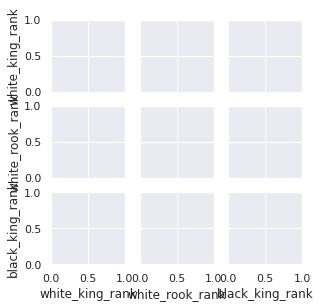

In [22]:
%matplotlib inline
sns.set()
sns.pairplot(df, hue="a", height=1.5)

Notice from the visualization above that the different classes seem to be pretty distinguishable on each pair of features.

Imagine trying to draw a line on these plots that separates the boundary between one class and another. Can it be done?

__HINT:__ YES! It can.

## Step 2: Separate Out Features From Labels

Machine Learning algorithms expect the features (usually referred to as __X__ ) to be separated from the labels, usually referred to as `y`).


<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/figures/05.02-samples-features.png" />

<center>
    <strong>Figure 1:</strong> This is how Scikit-Learn wants your data to look like
</center>

Luckily, DataFrames work much like Excel, so we can just filter out the `Name` column out of the features and create a separate DataFrame for just that.

In [ ]:
# axis=1 is to indicate we're dropping a column. Default behavior is
# axis=0, which means we'd be trying to drop a row nicknamed "Name"
# which we don't even have.
df_X = df.drop("Name", axis=1)

n_samples, n_features = df_X.shape

# Here we can use string formatting to format what we print out
# See if you can understand how this works.
print("We have {} samples".format(n_samples))
print("Each sample has {} features".format(n_features))

# Do .head() on the df_X to verify it looks how you expect it to.
df_X.head()

In [ ]:
# Now we can create df_y, which is just the column "Name"
df_y = df["Name"]

# Use .head() again to verify it looks right
df_y.head()

## Step 3: Create Test/Train Splits

Right now we have ALL of our features in `df_X` and ALL of our labels in `df_y`. We want to split those out into test and training sets.

__Training set__: The set of data our Machine Learning models will train on. The models will have access to both the features as well as the labels so they can learn to predict as accurately as possible on the training set.

__Test set__: This is the set of data the model will evaluate on. The model will get the features (in the real-world, this is what is __known__ ) but the labels will NOT be known to the model. This set will be treated as __new__ data for the model, so it won't be training to this data, it'll just spit out a label for the attributes you provide.

In [ ]:
from sklearn.model_selection import train_test_split

# For now, we'll use a helper function built-in to scikit-learn to
# split our data into a 70-30 split, with 70% going to our training set.
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y,
                                                    test_size=0.3,
                                                    random_state=seed)

# NOTE: We did this by hand in the past two days, make sure you
# understand the logic of how we did so before.

## Step 4: Create an Estimator (Supervised Learning Model)

Scikit-learn is really nice because of the API (Application Programming Interface) each Estimator (Model) gives us:

- Training: `model.fit(train_X, train_y)` is how we train a model
- Prediction: `model.predict(X)` is how we obtain the predictions for our matrix X. You can have predictions for `train_X` or `test_X`
- Accuracy: `model.score(X, y)` is how we determine how accurate our model is on a given set of data. For example, we would use this function with `test_X` and `test_y` to determine our model's test accuracy.


In [ ]:
# Let's start off with a Neural Network model
nn_model = MLPClassifier(random_state=seed)
nn_model.fit(train_X, train_y)

# Now get our training and test accuracy
train_acc = nn_model.score(train_X, train_y)
test_acc = nn_model.score(test_X, test_y)

# Format it to look a bit prettier -- a percentage
print("Train Accuracy: {:.1f}%".format(train_acc * 100))
print("Test Accuracy: {:.1f}%".format(test_acc * 100))

In [ ]:
# Now let's try using Naive Bayes
nb_model = GaussianNB()  # This model doesn't use random_state at all
nb_model.fit(train_X, train_y)

# Now get our training and test accuracy
train_acc = nb_model.score(train_X, train_y)
test_acc = nb_model.score(test_X, test_y)

# Format it to look a bit prettier -- a percentage
print("Train Accuracy: {:.1f}%".format(train_acc * 100))
print("Test Accuracy: {:.1f}%".format(test_acc * 100))

### TODO
You should use each of the following classifiers and build, train, and evaluate models out of them. Use `random_state=seed` wherever possible.

- `KNeighborsClassifier` -- call it `knn_model`
- `DecisionTreeClassifier` -- call it `dt_model`
- `RandomForestClassifier` -- call it `rf_model`
- `SVC` -- call it `svm_model`

## Step 5: Evaluation
Aside from evaluating just accuracy, we can use many other means to evaluate how well our model performed.

One way we can evaluate the model is by using a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

In [ ]:
# First get our predictions on the test set.
nn_y_predictions = nn_model.predict(test_X)

# Now use those and test_y to create the confusion matrix
nn_confusion_matrix = confusion_matrix(test_y, nn_y_predictions)

# Finally, plot it using seaborn. A heatmap is a nice way to show this
sns.heatmap(nn_confusion_matrix, square=True, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

In [ ]:
# Let's do the same thing using our Naive Bayes model to compare
# First get our predictions on the test set.
naive_bayes_y_predictions = nb_model.predict(test_X)

# Now use those and test_y to create the confusion matrix
naive_bayes_confusion_matrix = confusion_matrix(test_y, naive_bayes_y_predictions)

# Finally, plot it using seaborn. A heatmap is a nice way to show this
sns.heatmap(naive_bayes_confusion_matrix, square=True, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('Actual label');